In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df=pd.read_csv('wine_fraud.csv')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,Legit,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,Legit,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,Legit,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,Legit,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,Legit,red


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   object 
 12  type                  6497 non-null   object 
dtypes: float64(11), object(2)
memory usage: 660.0+ KB


In [7]:
df['quality'].value_counts()

quality
Legit    6251
Fraud     246
Name: count, dtype: int64

<Axes: xlabel='quality', ylabel='count'>

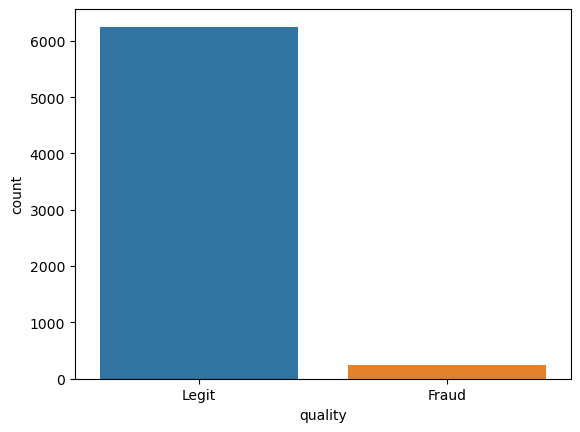

In [17]:
sns.countplot(x=df['quality'] , hue=df['quality'] )

<Axes: xlabel='type', ylabel='count'>

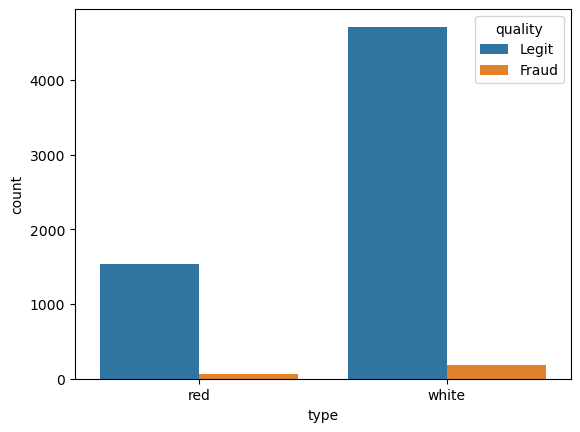

In [19]:
sns.countplot(x=df['type'] , hue=df['quality'])

In [33]:
reds=df[df['type']=='red']
print('percentage of fraud in red wines:')
len(reds[reds['quality']=='Fraud'])/len(reds)*100

percentage of fraud in red wines:


3.9399624765478425

In [37]:
whites=df[df['type']=='white']
print('percentage of fraud in white wines:')
len(whites[whites['quality']=='Fraud'])/len(whites)*100

percentage of fraud in white wines:


3.7362188648427925

In [7]:
df['Fraud']=df['quality'].map({'Legit' : 0 , 'Fraud' :1})
df.corr(numeric_only=True)['Fraud'].sort_values()

free sulfur dioxide    -0.085204
citric acid            -0.061789
alcohol                -0.051141
residual sugar         -0.048756
total sulfur dioxide   -0.035252
sulphates              -0.034046
density                 0.016351
pH                      0.020107
fixed acidity           0.021794
chlorides               0.034499
volatile acidity        0.151228
Fraud                   1.000000
Name: Fraud, dtype: float64

<Axes: >

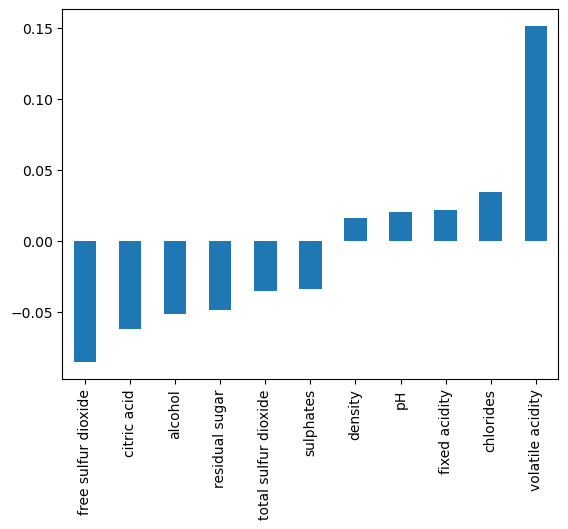

In [9]:
df.corr(numeric_only=True)['Fraud'][:-1].sort_values().plot(kind='bar')

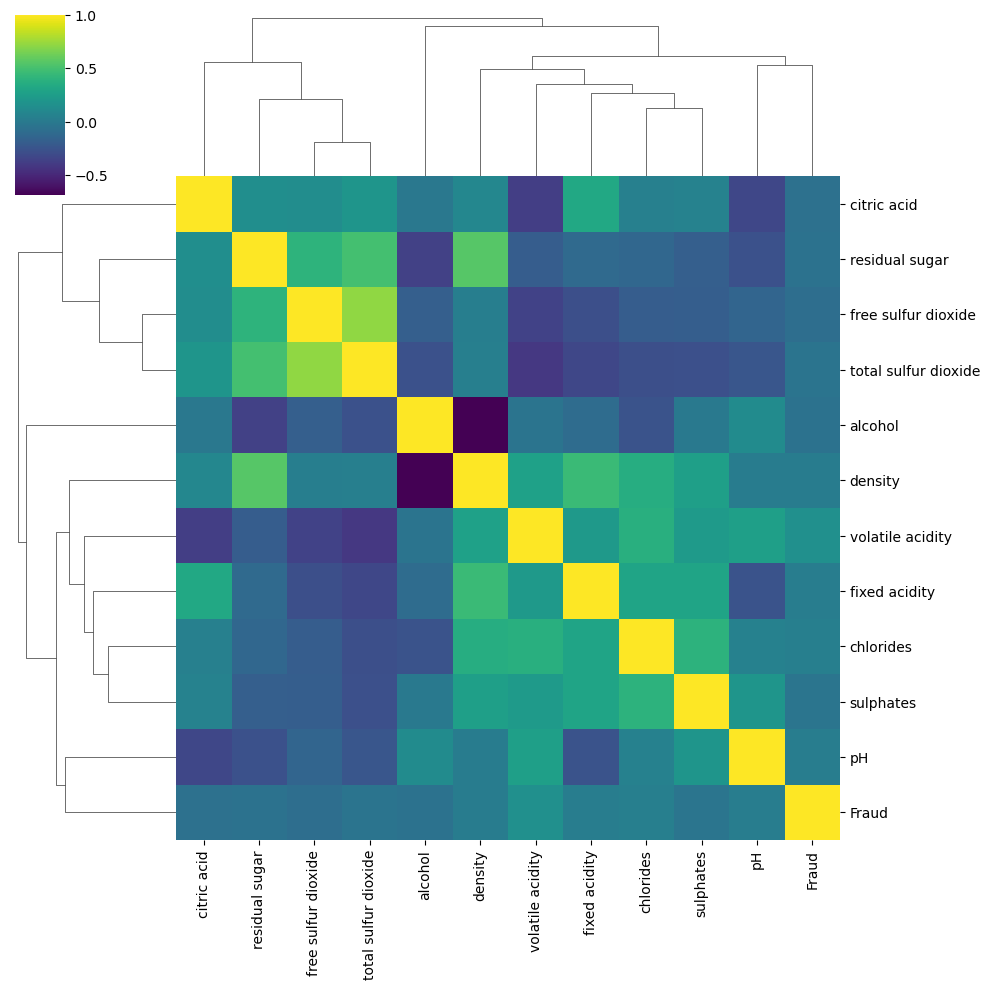

In [11]:
sns.clustermap(df.corr(numeric_only=True) , cmap='viridis')

In [5]:
df['type']=pd.get_dummies(df['type'] , drop_first=True , dtype=np.int64)

In [7]:
#df=df.drop('Fraud' , axis=1)
X=df.drop('quality' , axis=1)
y=df['quality']

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

In [9]:
X_train , X_test , y_train , y_test =train_test_split(X , y , test_size=.1 , random_state=101)
scale=StandardScaler()
X_train=scale.fit_transform(X_train)
X_test=scale.transform(X_test)
svc_model=SVC(class_weight='balanced')

In [11]:
param_grid={'kernel':['rbf' , 'poly'],
            'C':[.0001, .001,.01 , .1 ],
            'gamma' :['scale' , 'auto'],
            'degree' :[4,5,6]}
grid_model=GridSearchCV(svc_model, param_grid , cv=10)

In [13]:
grid_model.fit(X_train , y_train)

GridSearchCV(cv=10, estimator=SVC(class_weight='balanced'),
             param_grid={'C': [0.0001, 0.001, 0.01, 0.1], 'degree': [4, 5, 6],
                         'gamma': ['scale', 'auto'],
                         'kernel': ['rbf', 'poly']})

In [15]:
grid_model.best_params_

{'C': 0.0001, 'degree': 4, 'gamma': 'scale', 'kernel': 'poly'}

# model Evaluating

In [18]:
from sklearn.metrics import classification_report , ConfusionMatrixDisplay , PrecisionRecallDisplay , RocCurveDisplay

In [20]:
y_pred=grid_model.predict(X_test)
print(classification_report(y_test , y_pred))

              precision    recall  f1-score   support

       Fraud       0.00      0.00      0.00        27
       Legit       0.96      1.00      0.98       623

    accuracy                           0.96       650
   macro avg       0.48      0.50      0.49       650
weighted avg       0.92      0.96      0.94       650



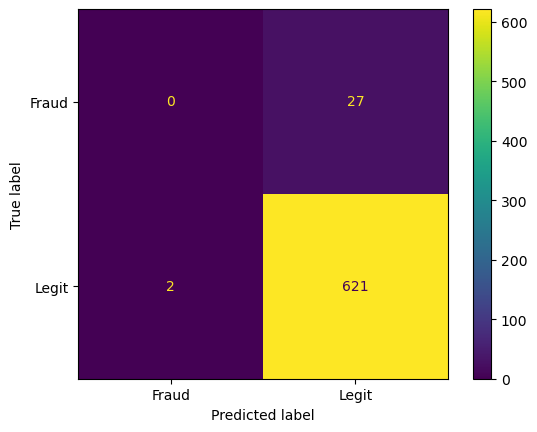

In [22]:
ConfusionMatrixDisplay.from_predictions(y_test , y_pred)